## Gantt charts with Python’s Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('PLAN_Int.xlsx')

In [2]:
df['Task'] = df['Task'].astype(str)
df.dtypes

Task          object
Attività      object
Start          int64
Lenght         int64
Completion     int64
dtype: object

In [3]:
proj_start = df.Start.min()       # number of days from project start to task start
df['start_num'] = (df.Start-proj_start)    # number of days from project start to end of tasks
df['end_num'] = (df.Lenght+df.start_num)       # days between start and end of each task
df['months_start_to_end'] = df.end_num - df.start_num
df.Task.to_string()
df

,Task,Attività,Start,Lenght,Completion,start_num,end_num,months_start_to_end
0,1.1,1.1 Organizzazione e gestione delle riunioni d...,1,2,1,0,2,2
1,1.2,1.2- Verifiche qualità ed indicatori,3,36,1,2,38,36
2,1.3,1.3 perfezionamento convenzioni con istituzioni,1,36,1,0,36,36
3,1.4,1.4 approvazione comitato etico per spin off d...,1,8,1,0,8,8
4,1.5,"1.5 promozione del progetto: istituzioni, oper...",6,36,1,5,41,36
5,1.6,1.6 gruppo di lavoro con società scientifiche ...,12,36,1,11,47,36
6,2.1,"2.1 procedura di gara: redazione capitolato, d...",1,5,1,0,5,5
7,2.2,2-2 strutturazione formale della rete,1,3,1,0,3,3
8,2.3,2.3 ottimizzazione piattaforma digitale,2,5,1,1,6,5
9,2.4,2.4 ottimizzazione software spectrum,1,6,1,0,6,6


In [4]:
jobDesc = df['Task'].to_list()
colorPalette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',
                '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#d1c2a8', '#816737', '#a99e79', '#dedeb0', '#31634f', '#679e6c', '#b1ce8d']
c_dict = dict(zip(jobDesc, colorPalette))
legend = dict(zip(df.Attività.to_list(), colorPalette ))

IntervalIndex([(1, 2], (4, 5], (7, 8], (10, 11], (13, 14] ... (22, 23], (25, 26], (28, 29], (31, 32], (34, 35]], dtype='interval[int64, right]')


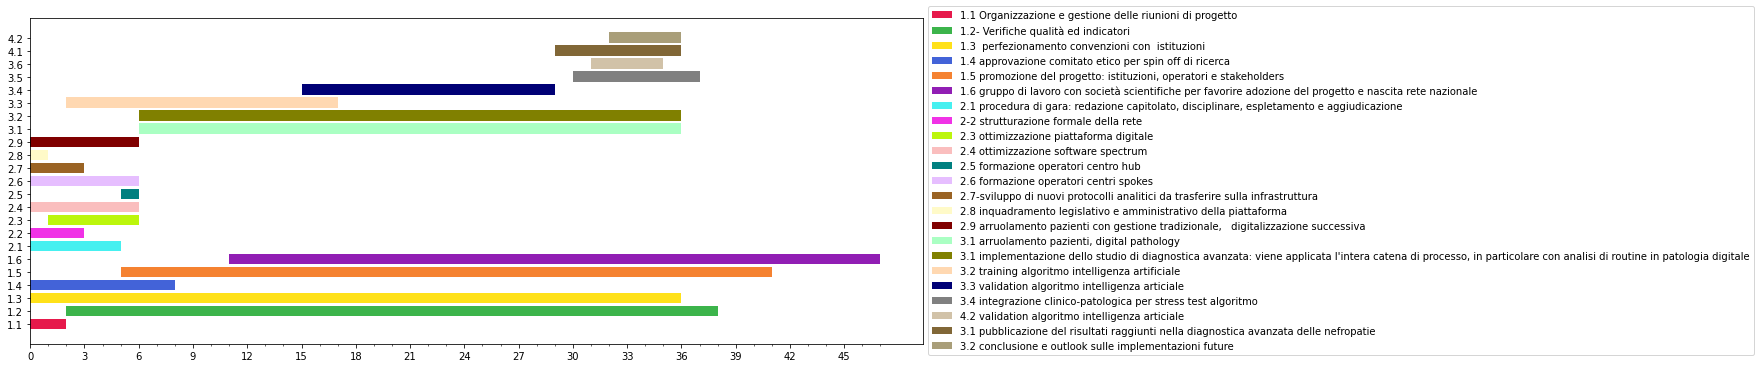

In [5]:
# create a column with the color for each department
def color(row):
    c_dict = dict(zip(jobDesc, colorPalette))
    return c_dict[row['Task']]
df['color'] = df.apply(color, axis=1)

from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.months_start_to_end, left=df.start_num, color=df.color)

##### LEGENDS #####
legend_dict = dict(zip(df.Attività.to_list(), colorPalette ))
legend_elements = [Patch(facecolor=legend_dict[i], label=i)  for i in legend_dict]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
#xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")  
xticks_labels = pd.interval_range(proj_start, end=df.Lenght.max())      ## modifica per interi
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
#pd.interval_range

ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
#ax.set_xticklabels(xticks_labels[::3])
print(xticks_labels[::3])

plt.show()

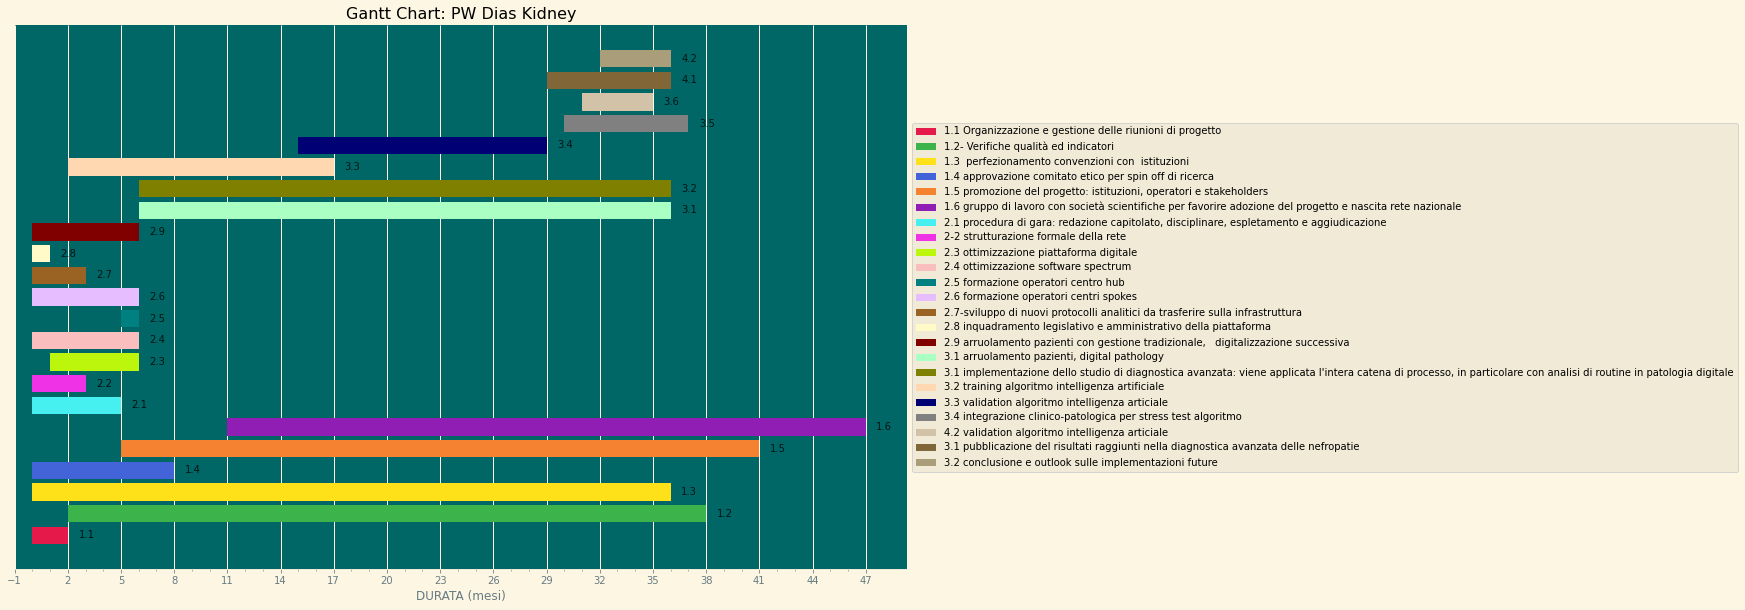

In [6]:
# months between start and current progression of each task
df['current_num'] = (df.months_start_to_end * df.Completion)

from matplotlib.patches import Patch

plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(1, figsize=(16,10))

# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.months_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

# texts
for idx, row in df.iterrows():
    ax.text(row.end_num+0.6, idx, f"{row.Task}", va='center', alpha=0.8)
            
##### LEGENDS #####
legend_dict = dict(zip(df.Attività.to_list(), colorPalette ))
legend_elements = [Patch(facecolor=legend_dict[i], label=i)  for i in legend_dict]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Gantt Chart: PW Dias Kidney')
 

##### TICKS #####
xticks = np.arange(-1, df.end_num.max()+1, 3)
#xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_labels = pd.interval_range(proj_start, end=df.Lenght.max())      ## modifica per interi
xticks_minor = np.arange(0, df.end_num.max()+1, 1)

ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
#ax.set_xticklabels(xticks_labels[::3])

ax.set_xlabel('DURATA (mesi)')
ax.set_ylabel('Attività')

#aggiunta
ax.yaxis.set_visible(False)
ax.set_facecolor('#006666')
#fig.set_facecolor('#006666')
#ax.axis('off')
ax.spines[["top", "right", 'left']].set_visible(False)

plt.show()

## SIMPLE GANTT CHART

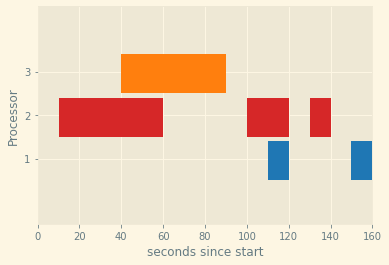

In [7]:
import matplotlib.pyplot as plt
fig, gnt = plt.subplots()
gnt.set_ylim(0, 50)
gnt.set_xlim(0, 160)
gnt.set_xlabel('seconds since start')
gnt.set_ylabel('Processor')
gnt.set_yticks([15, 25, 35])
gnt.set_yticklabels(['1', '2', '3'])
gnt.grid(True)
gnt.broken_barh([(40, 50)], (30, 9), facecolors =('tab:orange'))
gnt.broken_barh([(110, 10), (150, 10)], (10, 9),
                facecolors ='tab:blue')

gnt.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
                facecolors =('tab:red'))

#plt.savefig("gantt1.png") 